<a href="https://colab.research.google.com/github/SonalikaSingh/Digit_classification/blob/main/CB_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries and modules
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt


In [ ]:
#Loading training and test dataset

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
#Normalising dataset

X_train = X_train / 255
X_test = X_test / 255
#X_train=X_train/255
#X_test=X_test/255

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
#Flattening
X_train_f=X_train.reshape(len(X_train),28*28)
X_test_f=X_test.reshape(len(X_test),28*28)


In [ ]:
X_test_f.shape

(10000, 784)

In [ ]:
print(y_train[0])

5


In [ ]:
#Creating sequential model
from keras.models import Sequential 
from keras.layers import Activation, Dense, Flatten 
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=784))
model.add(Dense(10, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
#Training the model
history=model.fit(X_train_f, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4569 - accuracy: 0.8709
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1304 - accuracy: 0.9612
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0843 - accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0620 - accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0490 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0359 - accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0308 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0240 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0186 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

In [ ]:
y_predicted = model.predict(X_test_f)
y_predicted[2]

array([2.5543064e-05, 9.9988043e-01, 3.3683807e-01, 4.1988492e-04,
       6.5114439e-02, 2.0483136e-04, 2.9888332e-02, 5.8281028e-01,
       3.0364057e-01, 2.0839859e-06], dtype=float32)

In [ ]:
np.argmax(y_predicted[2])

1

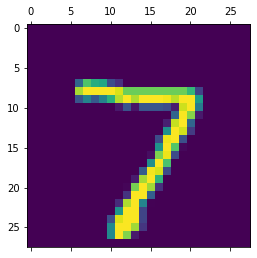

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    2,    0,    2,    0,    3,    1,    2,    0],
       [   0, 1125,    2,    3,    0,    1,    2,    0,    2,    0],
       [   2,    1, 1016,    1,    2,    1,    1,    7,    1,    0],
       [   1,    0,    6,  985,    0,    4,    0,    9,    1,    4],
       [   0,    0,    6,    0,  968,    0,    4,    0,    1,    3],
       [   2,    0,    0,    8,    1,  871,    4,    0,    3,    3],
       [   0,    3,    3,    1,    7,    3,  940,    0,    1,    0],
       [   1,    4,    6,    1,    1,    0,    0, 1011,    2,    2],
       [   5,    1,   12,    5,    8,    3,    5,    7,  920,    8],
       [   3,    4,    0,    6,   19,    4,    0,    9,    0,  964]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

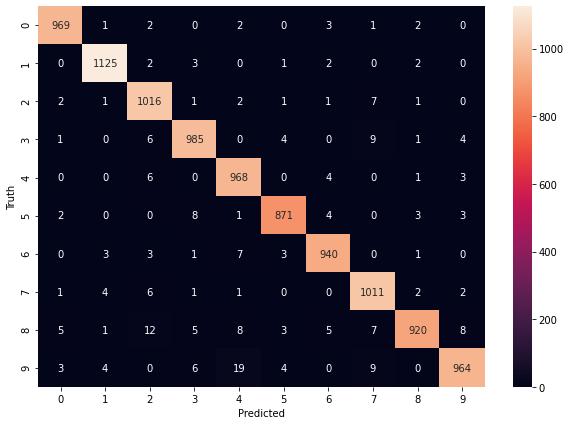

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

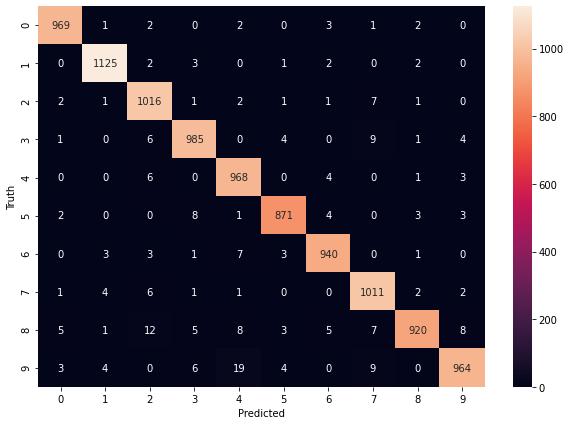

In [ ]:
#Confusion Matrix
y_predicted = model.predict(X_test_f)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#Evaluation
model.evaluate(X_test_f,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.9769


[0.0900157243013382, 0.9768999814987183]